![](Cintilla2004.png)

## **Curso de Inteligencia Artificial con Python y Scikit-Leaarn**
### Instructor: Dr. José Gabriel Rodríguez Rivas

<div style="color: blue;">
<h1> Practica 7: Análisis de Componentes Principales (PCA)</h1>
</div>


##   Reducción de Dimensionalidad mediante PCA 

La Reducción de Dimensionalidad mediante PCA (Análisis de Componentes Principales) puede ser útil para **simplificar los datos** en el dataset lending_club_2007_2011_6_states **al extraer las características más importantes o reducir la redundancia entre variables**.

- Transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas llamadas componentes principales.
- Este proceso ayuda a reducir la complejidad de los datos mientras se preserva la mayor cantidad posible de información relevante.
- Primero, se debe asegurar que los datos estén escalados y normalizados. Esto se debe a que el PCA es sensible a las escalas de las variables.

**Ejemplo práctico:**
Supongamos que tenemos un conjunto de datos con 4 características: altura, peso, edad y nivel de actividad física. Usando PCA, podrías transformar estas 4 características en 2 componentes principales:
- Componente 1 (PC1): Podría estar influido principalmente por altura y peso, explicando el 70% de la varianza.
- Componente 2 (PC2): Podría estar más relacionado con la edad y el nivel de actividad física, explicando el 20% de la varianza.
- En este caso, el PCA redujo 4 dimensiones a 2, conservando el 90% de la información total.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
# Cargar el dataset
prestamos = pd.read_csv("prestamos.csv")
# Exploración rápida
prestamos.head()

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt
0,2400,3,15.96,2,11,2,4,12252,8.72,98.5,0,1,3005.666844
1,10000,3,13.49,2,9,0,4,49200,20.00,21.0,0,1,12231.890000
2,3000,3,18.64,4,0,0,4,48000,5.35,87.5,0,1,3939.135294
3,5600,5,21.28,5,11,0,3,40000,5.55,32.6,0,0,647.500000
4,5375,5,12.69,1,9,5,4,15000,18.08,36.5,0,0,1484.590000


In [24]:
model_columns = ['funded_amnt', "int_rate", "grade_code", 'purpose_code', 
                 'addr_state_code',
                 'home_ownership_code', 'annual_inc', 'dti', 'revol_util', 
                 'pub_rec_bankruptcies']

X = prestamos[model_columns]
X.head()

,funded_amnt,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies
0,2400,15.96,2,11,2,4,12252,8.72,98.5,0
1,10000,13.49,2,9,0,4,49200,20.00,21.0,0
2,3000,18.64,4,0,0,4,48000,5.35,87.5,0
3,5600,21.28,5,11,0,3,40000,5.55,32.6,0
4,5375,12.69,1,9,5,4,15000,18.08,36.5,0


In [41]:
y = prestamos['repaid']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: repaid, dtype: int64

In [43]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.20758742,  1.04653339,  0.28771526, ..., -0.6435994 ,
         1.74122331, -0.19676047],
       [-0.14851581,  0.37863978,  0.28771526, ...,  1.04920704,
        -1.00854161, -0.19676047],
       [-1.1239765 ,  1.77121147,  1.72995   , ..., -1.14934033,
         1.3509341 , -0.19676047],
       ...,
       [ 1.94175711, -0.4055268 ,  0.28771526, ..., -1.34443327,
        -0.92693568, -0.19676047],
       [-1.1239765 , -0.4893515 ,  0.28771526, ..., -1.95222282,
        -1.7536392 , -0.19676047],
       [-0.84527345, -0.57588023, -0.43340212, ..., -0.74714873,
        -0.02927049, -0.19676047]])

### Aplicar PCA

In [45]:
# Inicializar PCA y especificar el número de componentes principales deseados
pca = PCA(n_components=2)  # Elegimos 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Mostrar la proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", np.cumsum(explained_variance))


Proporción de varianza explicada por cada componente: [0.24515346 0.14414767]
Varianza explicada acumulada: [0.24515346 0.38930113]


### Interpretación:

- El primer componente principal (PC1) explica aproximadamente el 24.52% de la variabilidad total de los datos. Esto significa que casi una cuarta parte de la información en las variables originales puede representarse mediante este componente.
- El segundo componente principal (PC2) explica alrededor del 14.41% de la variabilidad total. Este segundo componente captura información adicional no explicada por el primero, pero en menor medida.

### Especificar 6 componentes

In [116]:
# Inicializar PCA y especificar el número de componentes principales deseados
pca = PCA(n_components=8)  # Elegimos 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Mostrar la proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", np.cumsum(explained_variance))

Proporción de varianza explicada por cada componente: [0.24515346 0.14414767 0.11874062 0.10357263 0.09809103 0.0849997
 0.07801901 0.072922  ]
Varianza explicada acumulada: [0.24515346 0.38930113 0.50804175 0.61161438 0.70970541 0.79470511
 0.87272412 0.94564612]


### Interpretacion
 - La Varianza acumulada de los 6 componentes es del 79.47%.
 - El resto de la información (20.53%) está distribuida entre los componentes restantes.
 - Se puede trabajar con los primeros 6 componentes para reducir significativamente la dimensionalidad de los datos, conservando cerca del 80% de la información original.
 - Decidir cuántos componentes mantener depende del umbral de varianza acumulada que consideres suficiente, por ejmplo, Si el objetivo es conservar al menos el 90%, necesitariamos más componentes.
 -  **Cada componente principal es una combinación lineal de las variables originales, y los coeficientes asociados a estas variables**.
 -  Cada componente principal (PC1)es una suma ponderada de las variables originales (PC1 = aiX1, a2X2, a3X3.... anXn
 -  a1, a2, a3... an son los coeficientes o pesos que determinan cuánto contribuye cada variable x1, x2, x3 .. xn
 -  **El orden en el que aparecen las variables en el dataset no define directamente la estructura de los componentes**.

In [90]:
# Inicializar PCA y especificar el número de componentes principales deseados
pca = PCA(n_components=2)  # Elegimos 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Mostrar la proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", np.cumsum(explained_variance))

Proporción de varianza explicada por cada componente: [0.24515346 0.14414767]
Varianza explicada acumulada: [0.24515346 0.38930113]


In [92]:
X_pca

array([[ 0.85344502, -1.6831275 ],
       [-0.02207211, -0.85012726],
       [ 2.24372442, -1.27455551],
       ...,
       [-0.36959297,  1.06952436],
       [-1.4505413 ,  2.32530246],
       [-0.98820365,  0.24384409]])

In [97]:
# Coeficientes de las variables
components_df = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("Contribución de variables a cada componente:")
print(components_df)

Contribución de variables a cada componente:
     funded_amnt  int_rate  grade_code  purpose_code  addr_state_code  \
PC1     0.275325  0.594051    0.587323     -0.092401        -0.012857   
PC2     0.477991 -0.003866    0.002497      0.012610         0.121172   

     home_ownership_code  annual_inc       dti  revol_util  \
PC1             0.032429    0.068504  0.171456    0.423147   
PC2            -0.523011    0.584807 -0.286579   -0.230418   

     pub_rec_bankruptcies  
PC1              0.058755  
PC2             -0.076830  


###  Visualización de los datos reducidos

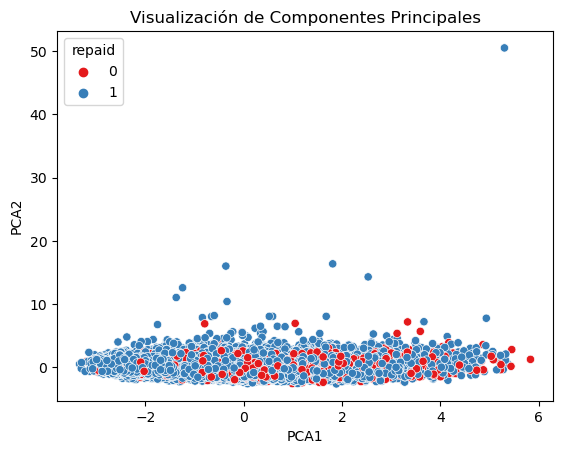

In [95]:
# Crear un dataframe con las componentes principales y la variable objetivo
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['repaid'] = prestamos['repaid'].values

# Visualizar los datos en el espacio reducido
import seaborn as sns
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='repaid', palette='Set1')
plt.title('Visualización de Componentes Principales')
plt.show()

### Determinar el número óptimo de componentes

Para seleccionar el número óptimo de componentes principales, podemos graficar la varianza explicada acumulada:

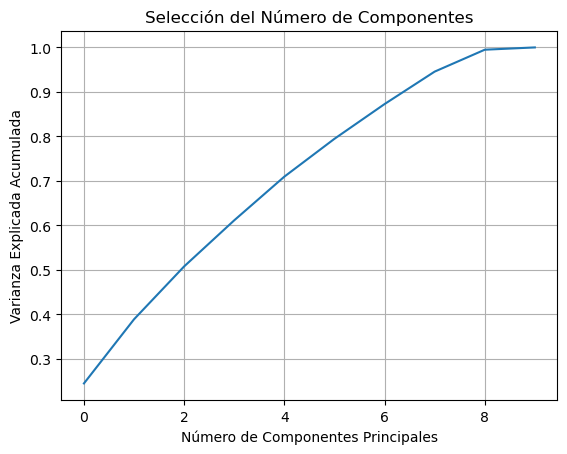

In [76]:
# Inicializar PCA sin especificar el número de componentes
pca_full = PCA()
pca_full.fit(X_scaled)

# Graficar la varianza acumulada
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Selección del Número de Componentes')
plt.grid()
plt.show()


### Usar los componentes principales para modelado

In [120]:
# Dividir el dataset X_pca para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, prestamos['repaid'],
                                                    test_size=0.3, random_state=42)

# Entrenar un modelo (por ejemplo, RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc1 = RandomForestClassifier(random_state=23)
rfc1 = rfc1.fit(X_train, y_train)

# Evaluación
y_pred = rfc1.predict(X_test)

from sklearn import metrics
print(f'Matriz Confusion:\n{metrics.confusion_matrix(y_test, y_pred)}')
print("")
print(classification_report(y_test, y_pred))


Matriz Confusion:
[[  26  904]
 [  52 4991]]

              precision    recall  f1-score   support

           0       0.33      0.03      0.05       930
           1       0.85      0.99      0.91      5043

    accuracy                           0.84      5973
   macro avg       0.59      0.51      0.48      5973
weighted avg       0.77      0.84      0.78      5973



### Con balanceo de clases



In [111]:
# Dividir el dataset X_pca para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, prestamos['repaid'],
                                                    test_size=0.3, random_state=42)

# Entrenar un modelo (por ejemplo, RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc1 = RandomForestClassifier(random_state=23, class_weight='balanced')
rfc1 = rfc1.fit(X_train, y_train)

# Evaluación
y_pred = rfc1.predict(X_test)

from sklearn import metrics
print(f'Matriz Confusion:\n{metrics.confusion_matrix(y_test, y_pred)}')
print("")
print(classification_report(y_test, y_pred))

Matriz Confusion:
[[  44  886]
 [ 137 4906]]

              precision    recall  f1-score   support

           0       0.24      0.05      0.08       930
           1       0.85      0.97      0.91      5043

    accuracy                           0.83      5973
   macro avg       0.55      0.51      0.49      5973
weighted avg       0.75      0.83      0.78      5973



### Balanceo de clase y max_depth

In [114]:
# Dividir el dataset X_pca para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, prestamos['repaid'],
                                                     random_state=42)

# Entrenar un modelo (por ejemplo, RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc1 = RandomForestClassifier(max_depth=7, random_state=23, class_weight='balanced')
rfc1 = rfc1.fit(X_train, y_train)

# Evaluación
y_pred = rfc1.predict(X_test)
from sklearn import metrics
print(f'Matriz Confusion:\n{metrics.confusion_matrix(y_test, y_pred)}')
print("")
print(classification_report(y_test, y_pred))

Matriz Confusion:
[[ 511  419]
 [1723 3320]]

              precision    recall  f1-score   support

           0       0.23      0.55      0.32       930
           1       0.89      0.66      0.76      5043

    accuracy                           0.64      5973
   macro avg       0.56      0.60      0.54      5973
weighted avg       0.79      0.64      0.69      5973

